<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Feedforward%20Neural%20Networks/ANN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install -q keras

In [42]:
# MLP for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the datasets
import sklearn.datasets
gila_river = pd.read_csv("https://raw.githubusercontent.com/asheta66/Machine-Learning-2022/main/Multiple%20Linear%20Regression/GilaRiverFlow.csv")
X = gila_river.iloc[:,:-1].values
y = gila_river.iloc[:,3].values
gila_river.head()

,y(k-1),y(k-2),y(k-3),y(k)
0,0,0,0,42
1,42,0,0,41
2,41,42,0,39
3,39,41,42,37
4,37,39,41,36


In [43]:
X

array([[  0,   0,   0],
       [ 42,   0,   0],
       [ 41,  42,   0],
       ...,
       [180, 203, 223],
       [159, 180, 203],
       [142, 159, 180]])

In [44]:
y

array([  42,   41,   39,   37,   36,   38,   39,   39,   40,   39,   40,
         41,   41,   39,   38,   40,   41,   39,   38,   41,   45,   43,
         43,   42,   45,   53,   46,   44,   52,  144,  204,  181,  177,
        170,  165,  163,  153,  148,  139,  143,  150,  154,  158,  160,
        146,  138,  139,  140,  139,  137,  131,  129,  123,  115,  117,
        119,  112,  109,  107,  110,  102,  109,  134,  126,  123,  137,
        157,  178,  192,  199,  200,  188,  177,  163,  153,  144,  134,
        134,  133,  130,  132,  133,  132,  133,  133,  132,  133,  133,
        126,  118,  110,  111,  114,  117,  117,  116,  118,  121,  112,
        102,   95,   91,   91,   92,   94,   96,   98,   97,   91,   93,
         91,   89,   85,   86,   87,   82,   86,   94,   92,   89,   85,
         80,   80,   73,   71,   76,   87,   92,   84,   74,   68,   71,
         72,   68,   72,   79,   85,   88,   89,   93,   97,   97,   92,
         86,   85,   84,   89,   85,   77,   67,   

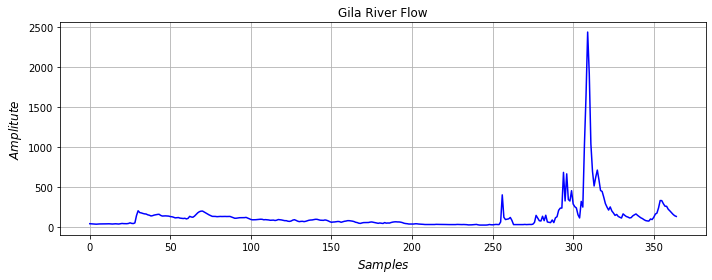

In [45]:
# Drawing river flow

fig, axs = plt.subplots(figsize=(10, 4), tight_layout=True)
plt.plot(y, '-b')
plt.xlabel(r'$ Samples $', fontsize=12)
plt.ylabel(r'$ Amplitute $', fontsize=12)
plt.title(r'Gila River Flow', fontsize=12)
plt.grid(True)
plt.show()

In [46]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [50]:
X_train.shape, y_train.shape

((292, 3), (292,))

In [52]:
# import TensorFlow
import tensorflow as tf
tf.__version__

'2.8.2'

In [61]:
# Set the random seed
tf.random.set_seed(42)

# Create a model (with 3 layers)
model = tf.keras.Sequential([
   tf.keras.layers.Dense(100), # add 100 dense neurons
   tf.keras.layers.Dense(10), # add another layers with 10 neurons
   tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
10/10 [==============================] - 1s 25ms/step - loss: -2045.4614 - accuracy: 0.0000e+00 - val_loss: -1764.9426 - val_accuracy: 0.0000e+00
Epoch 2/5
10/10 [==============================] - 0s 6ms/step - loss: -2045.4614 - accuracy: 0.0000e+00 - val_loss: -1764.9426 - val_accuracy: 0.0000e+00
Epoch 3/5
10/10 [==============================] - 0s 5ms/step - loss: -2045.4617 - accuracy: 0.0000e+00 - val_loss: -1764.9426 - val_accuracy: 0.0000e+00
Epoch 4/5
10/10 [==============================] - 0s 6ms/step - loss: -2045.4614 - accuracy: 0.0000e+00 - val_loss: -1764.9426 - val_accuracy: 0.0000e+00
Epoch 5/5
10/10 [==============================] - 0s 7ms/step - loss: -2045.4613 - accuracy: 0.0000e+00 - val_loss: -1764.9426 - val_accuracy: 0.0000e+00


In [62]:
history

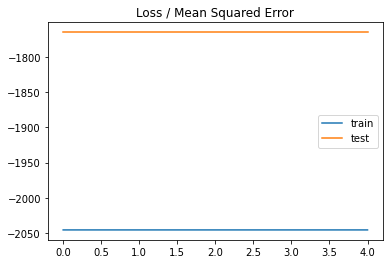

In [64]:
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()